In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Ładowanie zbioru treningowego, testowego,i dodawanie nazw kolumn: class, pixel1, pixel2,...pixel 784

Załadowano zbiór treningowy i testowy, dodano nazwy kolumn (class, pixel1, pixel2 … pixel 784).

    Określono liczbę rekordów oraz cech w zbiorze treningowym i testowym.
    Obliczono rozkład kategorii w procentach i przedstawiono go na wykresie słupkowym.
    

In [ ]:
column_names = ['class'] + [f'pixel{i}' for i in range(1, 785)]

In [ ]:
train_df = pd.read_csv('/content/mnist_train.csv', names= column_names)
test_df = pd.read_csv('/content/mnist_test.csv', names= column_names)

In [ ]:
X_train = train_df.iloc[:, 1:]
y_train = train_df.iloc[:, 0]
X_test = test_df.iloc[:, 1:]
y_test = test_df.iloc[:, 0]

In [ ]:
train_df.head()

,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Przeanalizowano główne składowe PCA:

    Ustalono wartość parametru pca.explained_variance_ratio_, aby wyjaśniona wariancja wynosiła 90%.
    Obliczono liczbę wymiarów potrzebną do osiągnięcia tej wartości.

In [ ]:
train_df.shape

(60000, 785)

In [ ]:
test_df.shape

(10000, 785)

In [ ]:
train_df["class"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 60000 entries, 0 to 59999
Series name: class
Non-Null Count  Dtype
--------------  -----
60000 non-null  int64
dtypes: int64(1)
memory usage: 468.9 KB


Wyznaczyć rozkład kategorii (w procentach).

In [ ]:
class_distribution = pd.concat([train_df, train_df], axis=0)["class"].value_counts()
class_distribution

,count
class,
1,5092
3,4672
7,4648
9,4518
0,4452
6,4410
2,4364
4,4356
8,4278


Narysować wykres słupkowy rozkładu kategorii.

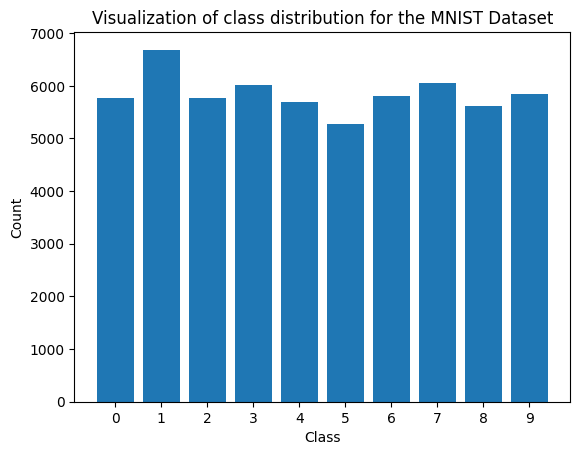

In [ ]:
plt.bar(class_distribution.index.to_list(), class_distribution.values)
plt.xticks(class_distribution.index.to_list())
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Visualization of class distribution for the MNIST Dataset')
plt.show()

 Wizualizowanie 8 pierwszych liter w zbiorze uczącym i 8 pierwszych w zbiorze testowym.


In [ ]:
def show_first_n_images(df, n):
  for i in range(8):
    image = df.iloc[i, 1:].to_numpy().reshape(28, 28)
    plt.subplot(240+1+i)
    plt.imshow(image, cmap='gray')
  plt.show()

In [ ]:
import time
def aument_data(df):
  columns = df.columns.to_list()
  labels = df.iloc[:, 0].to_numpy()
  images = df.iloc[:, 1:].to_numpy().reshape(-1, 28, 28)
  time_start = time.time()
  # Przygotowanie przesunięć wzdłuż osi
  moved_up = np.roll(images, 1, axis=1).reshape(images.shape[0], -1)
  # Przesunięcie w górę
  moved_down = np.roll(images, -1, axis=1).reshape(images.shape[0], -1)
  # Przesunięcie w dół
  moved_left = np.roll(images, 1, axis=2).reshape(images.shape[0], -1)
  # Przesunięcie w lewo
  moved_right = np.roll(images, -1, axis=2).reshape(images.shape[0], -1)
  # Przesunięcie w prawo
  original = images.reshape(images.shape[0], -1)  # Oryginalne obrazy

  # Dodanie etykiet jako pierwszej kolumny
  moved_up = np.hstack((labels[:, None], moved_up))
  moved_down = np.hstack((labels[:, None], moved_down))
  moved_left = np.hstack((labels[:, None], moved_left))
  moved_right = np.hstack((labels[:, None], moved_right))
  original = np.hstack((labels[:, None], original))

  # Scalanie wszystkich wariantów
  augmented_array = np.vstack((original, moved_up, moved_down, moved_left, moved_right))

  # Konwersja do DataFrame
  full_new_df = pd.DataFrame(augmented_array, columns=columns)

  print(f"Przetwarzanie zakończone w {time.time() - time_start} sekund")
  return full_new_df


In [ ]:
def aument_data(df):
  columns = df.columns.to_list()
  full_new_df = df.copy(deep=False)
  full_new_df = full_new_df[0:0]
  array = df.to_numpy()
  print(array.shape)

In [ ]:
aumented_df = aument_data(train_df)

Przetwarzanie zakończone w 0.8691437244415283 sekund


In [ ]:
aumented_df.dtypes

,0
class,float64
pixel1,float64
pixel2,float64
pixel3,float64
pixel4,float64
...,...
pixel780,float64
pixel781,float64
pixel782,float64
pixel783,float64


In [ ]:
aumented_df.shape

(300000, 785)

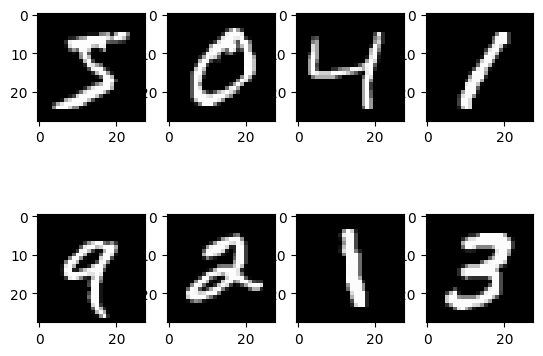

In [ ]:
show_first_n_images(aumented_df, 8)

Zwizualizowano dane w ich oryginalnej i skompresowanej postaci.

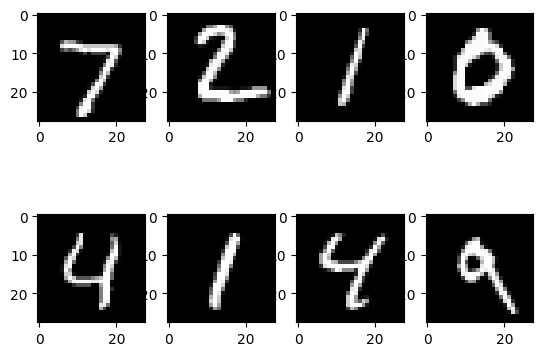

In [ ]:
show_first_n_images(test_df, 8)

Tworzenie klasyfikatora Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
decision_tree = DecisionTreeClassifier(criterion="gini")
decision_tree.fit(train_df.iloc[:, 1:], train_df.iloc[:, 0])
decision_tree_predictions = decision_tree.predict(test_df.iloc[:, 1:])

dt_acc_score = accuracy_score(test_df.iloc[:, 0], decision_tree_predictions)
dt_conf_matrix = confusion_matrix(test_df.iloc[:, 0], decision_tree_predictions)
dt_class_report = classification_report(test_df.iloc[:, 0], dt_decision_tree_predictions)

print("Accuracy Score:", acc_score)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy Score: 0.8775
Confusion Matrix:
 [[ 920    1    6    6    5   12   13    3    7    7]
 [   0 1088   10    2    4    4    7    5   13    2]
 [   9    9  885   29   15   12    9   27   27   10]
 [   9    7   27  849    9   54    5    7   22   21]
 [   6    4   14    5  858    8   14   10   21   42]
 [  12    7    3   41    8  742   27    4   30   18]
 [  14    4   10    7   18   21  858    2   19    5]
 [   2   11   21   13    7    4    3  932   13   22]
 [  12    7   27   38   23   30   11   12  787   27]
 [  11    5    7   21   45   13    7   19   25  856]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       980
           1       0.95      0.96      0.96      1135
           2       0.88      0.86      0.87      1032
           3       0.84      0.84      0.84      1010
           4       0.86      0.87      0.87       982
           5       0.82      0.83      0.83       892
           6       0.90 

In [ ]:
decision_tree = DecisionTreeClassifier(criterion="gini")
decision_tree.fit(aumented_df.iloc[:, 1:], aumented_df.iloc[:, 0])
decision_tree_predictions = decision_tree.predict(test_df.iloc[:, 1:])

aumented_dt_acc_score = accuracy_score(test_df.iloc[:, 0], decision_tree_predictions)
aumented_dt_conf_matrix = confusion_matrix(test_df.iloc[:, 0], decision_tree_predictions)
aumented_dt_class_report = classification_report(test_df.iloc[:, 0], decision_tree_predictions)

print("Accuracy Score:", aumented_dt_acc_score)
print("Confusion Matrix:\n", aumented_dt_conf_matrix)
print("Classification Report:\n", aumented_dt_class_report)

Accuracy Score: 0.9097
Confusion Matrix:
 [[ 931    0    4    1   10    9   13    4    5    3]
 [   0 1103    3    6    5    2    7    2    7    0]
 [   7   11  925   19   10    3    7   20   26    4]
 [   3    2   22  900    2   30    3    7   30   11]
 [   2    4    7    5  891    6   12    6   13   36]
 [   7    5    3   27    7  788   12    7   21   15]
 [  14    3    6    3   16   19  876    4   13    4]
 [   1    5   19   11    6    4    0  950   14   18]
 [  11    4   22   24   12   22   22    9  824   24]
 [   6    2    4   14   31   19    5    9   10  909]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       980
           1       0.97      0.97      0.97      1135
           2       0.91      0.90      0.90      1032
           3       0.89      0.89      0.89      1010
           4       0.90      0.91      0.90       982
           5       0.87      0.88      0.88       892
           6       0.92 

In [ ]:
best_accuracy = [0, 0]
tune_df = pd.DataFrame(columns=["Accuracy Score", "Criterion", "Min. Leafs", "Max. depth"])
for i in range(1, 1000, 10):
  for choice in ["gini", "entropy", "log_loss"]:
    for d in range(1, 42, 2):
      for min_weigth in range(1, 6):
        fine_tuned_decision_tree = DecisionTreeClassifier(criterion=choice, min_samples_leaf=i, max_depth=d, min_weight_fraction_leaf=min_weigth/10)
        fine_tuned_decision_tree.fit(train_df.iloc[:, 1:], train_df.iloc[:, 0])
        fine_tuned_decision_tree_predictions = fine_tuned_decision_tree.predict(test_df.iloc[:, 1:])
        acc_score = accuracy_score(test_df.iloc[:, 0], fine_tuned_decision_tree_predictions)
        tune_df = pd.concat([tune_df, pd.DataFrame(columns=["Accuracy Score", "Criterion", "Min. Leafs", "Max. depth"], data=[[acc_score, choice, i, d]])], ignore_index = True)
        if acc_score > best_accuracy[0]:
          best_accuracy = [acc_score, fine_tuned_decision_tree]

print(tune_df)
tuned_decision_tree = best_accuracy[1]
print("Best parameters:")
print(tuned_decision_tree.get_params())

In [ ]:
tune_df.sort_values(by=["Accuracy Score"], ascending=False).head()

,Accuracy Score,Criterion,Min. Leafs,Max. depth
165,0.5108,gini,21,31
310,0.5108,gini,41,21
690,0.5108,gini,91,31
235,0.5108,gini,31,21
615,0.5108,gini,81,31


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [5, 10, 15]
}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.fit(train_df.iloc[:, 1:], train_df.iloc[:, 0])
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 5}
Best Score: 0.87335


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy', "log_loss"],
    'max_depth': [30],
    'min_samples_split': [3, 5, 7],
    'min_samples_leaf': [2, 4, 6]
}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.fit(train_df.iloc[:, 1:], train_df.iloc[:, 0])
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'criterion': 'log_loss', 'max_depth': 30, 'min_samples_leaf': 6, 'min_samples_split': 5}
Best Score: 0.8730499999999999


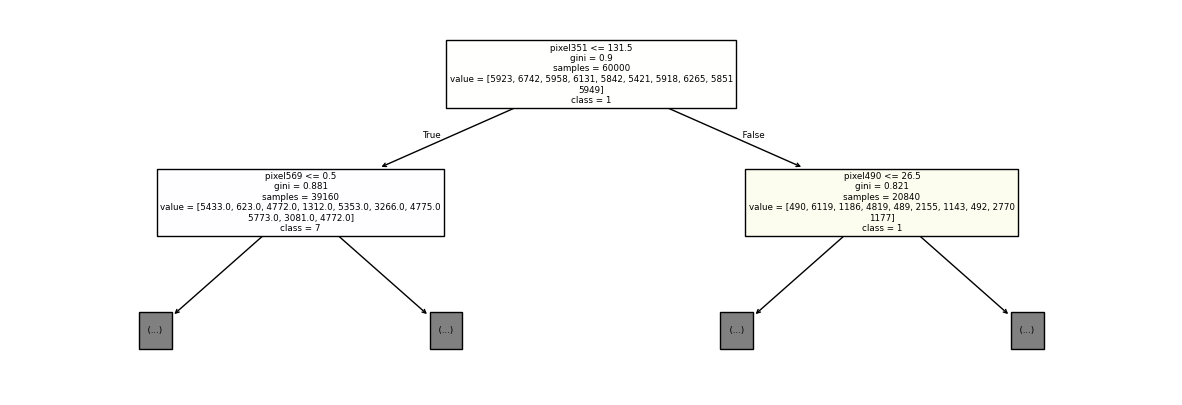

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
f_names = list(train_df.columns.values.tolist())
f_names = f_names[1:]
t_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
tree.plot_tree(decision_tree, max_depth =1, feature_names = f_names,
                   class_names=t_names, filled = True)
plt.show()

In [ ]:
from sklearn.tree import export_text
f_names = list(train_df.columns.values.tolist())
f_names = f_names[1:]
r = export_text(decision_tree, feature_names = f_names, max_depth = 3)
print(r)

|--- pixel351 <= 131.50
|   |--- pixel569 <= 0.50
|   |   |--- pixel431 <= 0.50
|   |   |   |--- pixel406 <= 2.50
|   |   |   |   |--- truncated branch of depth 30
|   |   |   |--- pixel406 >  2.50
|   |   |   |   |--- truncated branch of depth 19
|   |   |--- pixel431 >  0.50
|   |   |   |--- pixel212 <= 28.50
|   |   |   |   |--- truncated branch of depth 47
|   |   |   |--- pixel212 >  28.50
|   |   |   |   |--- truncated branch of depth 38
|   |--- pixel569 >  0.50
|   |   |--- pixel436 <= 0.50
|   |   |   |--- pixel490 <= 22.50
|   |   |   |   |--- truncated branch of depth 33
|   |   |   |--- pixel490 >  22.50
|   |   |   |   |--- truncated branch of depth 11
|   |   |--- pixel436 >  0.50
|   |   |   |--- pixel347 <= 0.50
|   |   |   |   |--- truncated branch of depth 24
|   |   |   |--- pixel347 >  0.50
|   |   |   |   |--- truncated branch of depth 19
|--- pixel351 >  131.50
|   |--- pixel490 <= 26.50
|   |   |--- pixel291 <= 34.50
|   |   |   |--- pixel487 <= 58.50
|   |   |  

Trenowanie zespołu klasyfikatorów RandomForest z optymalizacją parametrów.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_tree = RandomForestClassifier()
rf_tree.fit(train_df.iloc[:, 1:], train_df.iloc[:, 0])
rf_tree_predictions = rf_tree.predict(test_df.iloc[:, 1:])
rf_acc_score = accuracy_score(test_df.iloc[:, 0], rf_tree_predictions)
rf_conf_matrix = confusion_matrix(test_df.iloc[:, 0], rf_tree_predictions)
print("Accuracy Score:", rf_acc_score)
print("Confusion Matrix:\n", rf_conf_matrix)


Accuracy Score: 0.9693
Confusion Matrix:
 [[ 970    0    0    0    0    3    2    1    4    0]
 [   0 1125    2    2    0    2    2    0    2    0]
 [   7    0  997    5    2    0    4    9    8    0]
 [   0    0    8  975    0    8    0   10    6    3]
 [   1    0    3    0  953    0    4    0    3   18]
 [   3    0    2   11    2  859    5    2    5    3]
 [   8    3    0    0    3    4  937    0    3    0]
 [   1    3   23    0    3    0    0  985    3   10]
 [   3    0    6    9    4    6    5    3  933    5]
 [   8    6    1   14   11    1    1    4    4  959]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_tree = RandomForestClassifier()
rf_tree.fit(aumented_df.iloc[:, 1:], aumented_df.iloc[:, 0])
aumented_rf_tree_predictions = rf_tree.predict(test_df.iloc[:, 1:])
aumented_rf_acc_score = accuracy_score(test_df.iloc[:, 0], rf_tree_predictions)
aumented_rf_conf_matrix = confusion_matrix(test_df.iloc[:, 0], rf_tree_predictions)
print("Accuracy Score:", aumented_rf_acc_score)
print("Confusion Matrix:\n", aumented_rf_conf_matrix)

Accuracy Score: 0.9693
Confusion Matrix:
 [[ 970    0    0    0    0    3    2    1    4    0]
 [   0 1125    2    2    0    2    2    0    2    0]
 [   7    0  997    5    2    0    4    9    8    0]
 [   0    0    8  975    0    8    0   10    6    3]
 [   1    0    3    0  953    0    4    0    3   18]
 [   3    0    2   11    2  859    5    2    5    3]
 [   8    3    0    0    3    4  937    0    3    0]
 [   1    3   23    0    3    0    0  985    3   10]
 [   3    0    6    9    4    6    5    3  933    5]
 [   8    6    1   14   11    1    1    4    4  959]]


Trenowanie zespołu klasyfikatorów ExtraTree z optymalizacją parametrów.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
et_tree = ExtraTreesClassifier()
et_tree.fit(train_df.iloc[:, 1:], train_df.iloc[:, 0])
et_tree_predictions = et_tree.predict(test_df.iloc[:, 1:])
et_acc_score = accuracy_score(test_df.iloc[:, 0], et_tree_predictions)
et_conf_matrix = confusion_matrix(test_df.iloc[:, 0], et_tree_predictions)
print("Accuracy Score:", et_acc_score)
print("Confusion Matrix:\n", et_conf_matrix)


Accuracy Score: 0.972
Confusion Matrix:
 [[ 970    0    1    0    0    2    3    1    3    0]
 [   0 1122    3    3    0    1    3    0    2    1]
 [   6    0  998    7    3    0    2   10    6    0]
 [   0    0    6  978    0   10    0    8    6    2]
 [   1    0    1    0  955    0    6    2    3   14]
 [   3    0    1   10    2  864    4    1    5    2]
 [   6    3    0    1    2    4  941    0    1    0]
 [   1    4   19    0    0    0    0  991    1   12]
 [   6    0    5    5    4    4    0    4  940    6]
 [   5    5    3    9   11    4    1    6    4  961]]


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
et_tree = ExtraTreesClassifier()
et_tree.fit(aumented_df.iloc[:, 1:], aumented_df.iloc[:, 0])
aumented_et_tree_predictions = et_tree.predict(test_df.iloc[:, 1:])
aumented_et_acc_score = accuracy_score(test_df.iloc[:, 0], et_tree_predictions)
aumented_et_conf_matrix = confusion_matrix(test_df.iloc[:, 0], et_tree_predictions)
print("Accuracy Score:", et_acc_score)
print("Confusion Matrix:\n", et_conf_matrix)


Accuracy Score: 0.972
Confusion Matrix:
 [[ 970    0    1    0    0    2    3    1    3    0]
 [   0 1122    3    3    0    1    3    0    2    1]
 [   6    0  998    7    3    0    2   10    6    0]
 [   0    0    6  978    0   10    0    8    6    2]
 [   1    0    1    0  955    0    6    2    3   14]
 [   3    0    1   10    2  864    4    1    5    2]
 [   6    3    0    1    2    4  941    0    1    0]
 [   1    4   19    0    0    0    0  991    1   12]
 [   6    0    5    5    4    4    0    4  940    6]
 [   5    5    3    9   11    4    1    6    4  961]]


Trenowanie zespołu klasyfikatorów XGBoost z optymalizacją parametrów.

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
xgb_tree = xgb.XGBClassifier()
xgb_tree.fit(train_df.iloc[:, 1:], train_df.iloc[:, 0])
xgb_tree_predictions = xgb_tree.predict(test_df.iloc[:, 1:])
xgb_acc_score = accuracy_score(test_df.iloc[:, 0], xgb_tree_predictions)
xgb_conf_matrix = confusion_matrix(test_df.iloc[:, 0], xgb_tree_predictions)
print("Accuracy Score:", xgb_acc_score)
print("Confusion Matrix:\n", xgb_conf_matrix)

Accuracy Score: 0.9795
Confusion Matrix:
 [[ 970    1    0    0    0    2    3    1    2    1]
 [   1 1125    3    2    0    1    2    1    0    0]
 [   5    0 1008    7    2    0    0    6    3    1]
 [   1    0    3  990    0    3    0    6    4    3]
 [   0    0    2    1  958    0    4    0    2   15]
 [   2    1    0    5    0  872    4    3    3    2]
 [   5    3    1    0    2    4  940    0    3    0]
 [   1    1   13    1    2    0    0 1000    1    9]
 [   3    1    2    3    3    4    2    1  951    4]
 [   5    4    1    5    6    0    0    4    3  981]]


In [ ]:
import xgboost as xgb
xgb_tree = xgb.XGBClassifier()
xgb_tree.fit(aumented_df.iloc[:, 1:], aumented_df.iloc[:, 0])
xgb_tree_predictions = xgb_tree.predict(test_df.iloc[:, 1:])
xgb_acc_score = accuracy_score(test_df.iloc[:, 0], xgb_tree_predictions)
xgb_conf_matrix = confusion_matrix(test_df.iloc[:, 0], xgb_tree_predictions)
print("Accuracy Score:", xgb_acc_score)
print("Confusion Matrix:\n", xgb_conf_matrix)

Accuracy Score: 0.9845
Confusion Matrix:
 [[ 975    0    0    0    0    0    1    1    2    1]
 [   1 1127    2    1    1    0    1    1    1    0]
 [   0    0 1016    4    0    0    0    5    6    1]
 [   0    0    1  997    0    3    0    3    3    3]
 [   0    0    3    0  960    0    3    1    3   12]
 [   2    0    0    4    1  877    2    0    4    2]
 [   6    3    0    0    4    2  939    0    4    0]
 [   0    1   10    1    1    0    0 1007    2    6]
 [   3    0    1    0    2    2    1    1  962    2]
 [   5    5    2    3    4    1    0    1    3  985]]


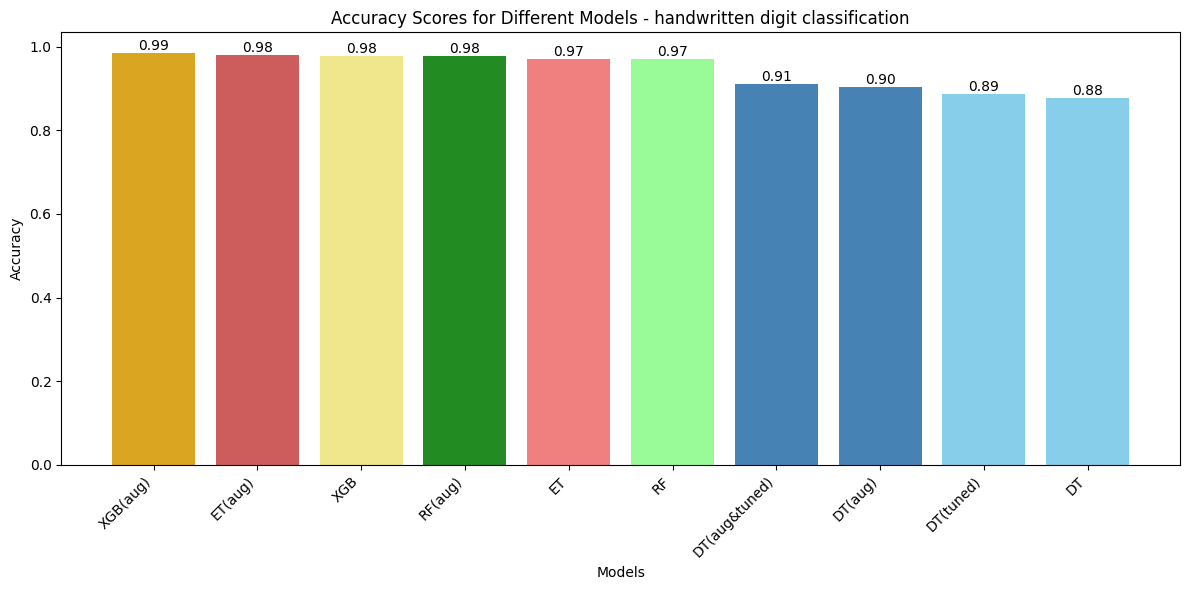